In [1]:
import pandas as pd

df1 = pd.read_csv("../../dataset_raw/HSC/label.csv")
df2 = pd.read_csv("../../dataset_raw/HSC_TNG50/label.csv")

In [3]:
quant1 = df1[["photoz", "i_cmodel_mag_ge"]]
quant2 = df2[['z', 'i_band_mag_dust_apparent']]

len(quant1)
len(quant2)

8980

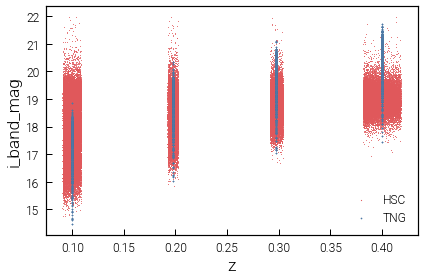

In [3]:
import matplotlib.pyplot as plt
plt.scatter(quant1["photoz"], quant1["i_cmodel_mag_ge"], s=1, label="HSC")
plt.scatter(quant2["z"], quant2["i_band_mag_dust_apparent"], s=2, label="TNG")
plt.xlabel("z")
plt.ylabel("i_band_mag")
plt.legend()

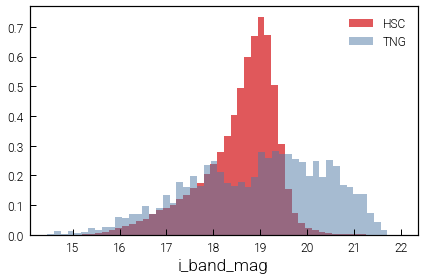

In [4]:
bins = 50
plt.hist(quant1["i_cmodel_mag_ge"], density=True, label="HSC", bins=bins)
plt.hist(quant2["i_band_mag_dust_apparent"], density=True, alpha=0.5, label="TNG", bins=bins)
plt.xlabel("i_band_mag")
plt.legend()

In [7]:
from sklearn.preprocessing import StandardScaler
import numpy as np

source = np.array(quant1)
target = np.array(quant2)

scaler = StandardScaler()
scaler.fit(target)

source = scaler.transform(source)
target = scaler.transform(target)

In [12]:
from sklearn.neighbors import KDTree

MATCHING_MAX_ITER = 100
MATCHING_MAX_DIST = 0.05
        
#Create a KDTree to search for the nearest galaxy in the sample to match
kdt = KDTree(source, metric='euclidean')
        
#Set of already used indexes
index_set = set()
        
#Output list containing the matched 
matched_indexes = []
        
#Output mask to remove targets which have no unique source that is within the Maximum matching radius 
matched_mask = []
        
for x in target:
    for i in range(MATCHING_MAX_ITER): 
        distance, index = kdt.query([x], k=i+1, return_distance=True)
        distance = distance[0,-1]
        index = index[0,-1]
                    
        if distance>MATCHING_MAX_DIST or i == MATCHING_MAX_ITER-1:
            matched_mask.append(False)
            break
        
        if index not in index_set:
            matched_mask.append(True)
            index_set.add(index)
            matched_indexes.append(index)
            break

#Ensure that there are no double matched galaxies
ux, counts = np.unique(matched_indexes, return_counts=True)
assert(np.sum(counts > 1) == 0)
        
#Print numer of matched galaxies
num_matched = str(np.sum(matched_mask))
num_target = str(len(matched_mask))
print("Number of matched galaxies: " + num_matched + " / " + num_target)


Number of matched galaxies: 6821 / 8980


In [13]:
df1_matched = df1.iloc[matched_indexes]
df1_matched = df1_matched
df2_matched = quant2[matched_mask]
df1_matched = df1_matched[["photoz", "i_cmodel_mag_ge"]]

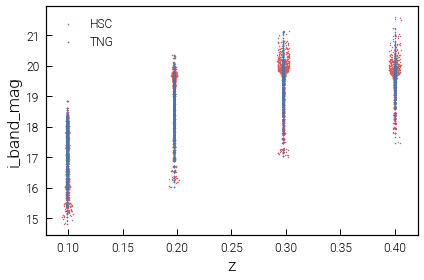

In [14]:
import matplotlib.pyplot as plt
plt.scatter(df1_matched["photoz"], df1_matched["i_cmodel_mag_ge"], s=2, label="HSC")
plt.scatter(df2_matched["z"], df2_matched["i_band_mag_dust_apparent"], s=2, label="TNG")
plt.xlabel("z")
plt.ylabel("i_band_mag")
plt.legend()

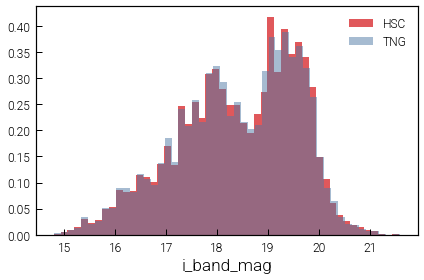

In [15]:
bins = 50
plt.hist(df1_matched["i_cmodel_mag_ge"], density=True, label="HSC", bins=bins)
plt.hist(df2_matched["i_band_mag_dust_apparent"], density=True, alpha=0.5, label="TNG", bins=bins)
plt.xlabel("i_band_mag")
plt.legend()